# Mean Shift

Mean shift is a procedure for locating the maxima—the modes—of a density function given discrete data sampled from that function. It is a centroid based algorithm, which works by updating candidates for centroids to be the mean of the points within a given region. These candidates are then filtered in a post-processing stage to eliminate near-duplicates to form the final set of centroids.
Given a candidate centroid x_i for iteration t, the candidate is updated according to the following equation:

x_i^{t+1} = x_i^t + m(x_i^t)

Where N(x_i) is the neighborhood of samples within a given distance around x_i and m is the mean shift vector that is computed for each centroid that points towards a region of the maximum increase in the density of points. This is computed using the following equation, effectively updating a centroid to be the mean of the samples within its neighborhood:

m(x_i) = frac{\sum_{x_j \in N(x_i)}K(x_j - x_i)x_j}{\sum_{x_j \in N(x_i)}K(x_j - x_i)}

Although the mean shift algorithm has been widely used in many applications, a rigid proof for the convergence of the algorithm using a general kernel in a high dimensional space is still not known

# Data Setup

The same data which is taken is DBSCAN clustering algorithm is taken here to check the difference in output.

Samples of windspeeds and rainfall are taken as data for the ALgorithm. The first parameter is set as Wind Speed and second parameter is taken as rainfall. Windspeed is in Miles/Hour and Rainfall in Centimeters.

Data = [[90,1.2],[85,.9],[60,3.1],[70,2.3],[100,4.2],[120,5.1],[35,6.2],[70,3.4],[45,3.2],[55,4.1],[82,1.3],[90,4.8],[95,6.2] ,[69,3.1],[83,6.2],[85,3.2],[95,4.3],[120,7.2],[110,6.5],[105,5.5]]

# Algorithm:

In [1]:
print(__doc__)

import numpy as np
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.datasets.samples_generator import make_blobs

# #############################################################################
# Generate sample data
centers = [[90,1.2],[60,3.1],[70,2.3],[100,4.2],[120,5.1],[70,3.4],[45,3.2],[55,4.1],[82,1.3],[90,4.8]
             ,[95,6.2],[69,3.1],[85,3.2],[95,4.3],[120,7.2],[110,6.5],[105,5.5],[85,0.9],[35,6.2],[83,6.2]]
X, _ = make_blobs(n_samples=10000, centers=centers, cluster_std=0.6)

# #############################################################################
# Compute clustering with MeanShift

# The following bandwidth can be automatically detected using
bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=500)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)



Automatically created module for IPython interactive environment
number of estimated clusters : 5


# Plot result:

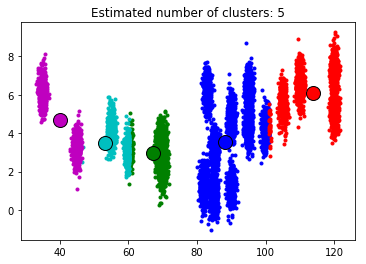

In [2]:
# Plot result
import matplotlib.pyplot as plt
from itertools import cycle

plt.figure(1)
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(X[my_members, 0], X[my_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

We can observe for the same inputs the number of clusters and the clustering of the 
data is entirely different in Mean Shift algorithm as compared to DBSCAN algorithm

# Advantages and Disadvantages of mean Shift Algorithm:

Advantages:
    
1)Mean shift is an application-independent tool suitable for real data analysis.

2)Does not assume any predefined shape on data clusters.

3)It is capable of handling arbitrary feature spaces.

4)The procedure relies on choice of a single parameter: bandwidth.

Disadvantages:

1)The selection of a window size is not trivial.

2)Inappropriate window size can cause modes to be merged, or generate additional “shallow” modes.

3)Often requires using adaptive window size.

# Citations and References:

https://en.wikipedia.org/wiki/Mean_shift

http://scikit-learn.org/stable/modules/clustering.html#mean-shift
    
http://scikit-learn.org/stable/auto_examples/cluster/plot_mean_shift.html
    
http://scikit-learn.org/stable/modules/generated/sklearn.cluster.MeanShift.html